In [43]:
import os
os.system("pip3 install opencv-contrib-python")
os.system("pip3 install matplotlib")

0

In [44]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [45]:


class Image:
    def __init__(self):
        self.img=""

    def read_local_img(self,path,val=0):
        self.img = cv2.imread(path)
        if(val==0):
            self.img = cv2.cvtColor(self.img, cv2.COLOR_BGR2RGB)
        
    def bgr_to_rgb(self):
        self.img = cv2.cvtColor(self.img, cv2.COLOR_BGR2RGB)
    def grayscale(self):
        self.img = cv2.imread(self.img, cmap="gray")
        
    def print_img(self,fig_size=[0,0],axis_bool=False):
        if fig_size != [0,0]:
            plt.figure(figsize = [fig_size[0],fig_size[1]])
        plt.imshow(self.img)
        if(axis_bool==False):
            plt.axis('off')
        plt.show()

class Subplot:
    def __init__(self):
        self.x=1
        self.y=1
        self.fig=[16,16]
        self.arr=1
        self.tot=1
        self.tit=[]

    def print_img_subplot(self,x,y,fi,tot,arr,tit,axis_bool=False):
        self.x=x
        self.y=y
        self.fig=fi
        self.arr=arr
        self.tot=tot
        self.tit=tit
        fig = plt.figure(figsize=(self.fig[0],self.fig[0]))
        for i in range(0,self.tot):
            ax = fig.add_subplot(self.x,self.y,1+i)
            ax.imshow(arr[i])
            ax.title.set_text(self.tit[i])
            if(axis_bool==False):
                ax.axis('off')

    def print_img_subplot2(self,x,y,fi,tot,arr,axis_bool=False):
        self.x=x
        self.y=y
        self.fig=fi
        self.arr=arr
        self.tot=tot
        f, axarr = plt.subplots(x,y)
        for i in range(0,tot):
            axarr[i//x,i%y].imshow(arr[i])


def grayscale_without_fun(img):
    a=img.size
    b=img[0].size
    c=img[0][0].size
    a=a//b
    b=b//c
    arr=np.zeros([a,b])
    maxi=0
    mini=1000
    for i in range(0,a):
        for j in range(0,b):
            sum=0
            for k in range(0,c):
                sum+=img[i][j][k]
                maxi=max(maxi,img[i][j][k])
                mini=min(mini,img[i][j][k])
            arr[i][j]=sum
    return arr,mini,maxi

def grayscale_without_fun2(img):
    a=img.size
    b=img[0].size
    c=img[0][0].size
    a=a//b
    b=b//c
    arr=np.zeros([a,b])
    maxi=0
    mini=1000
    but=[0.2989,0.5870,0.1140]
    for i in range(0,a):
        for j in range(0,b):
            sum=0
            for k in range(0,c):
                sum+=but[k]*img[i][j][k]
            arr[i][j]=sum
    return arr

def grayscale_cmap_fun(img,a,b):
    mid = (a+b)//2
    a=img.size
    b=img[0].size
    a=a//b
    maxi=0
    mini=1000
    for i in range(0,a):
        for j in range(0,b):
            img[i][j]=img[i][j]//mid
    return img

def cap_img_webcam(path):
    camera = cv2.VideoCapture(0)
    return_value, image = camera.read()
    cv2.imwrite(path, image)
    del(camera)
    return image


> # 1. Put 4 images of your choice in the src folder.
+ 1.jpg
+ 2.jpg
+ 3.jpg
+ 4.jpg

> # 2. Load the images using OpenCV.

In [46]:
img1 = Image()
img2 = Image()
img3 = Image()
img4 = Image()
img11 = Image()
img22 = Image()
img33 = Image()
img44 = Image()

img1.read_local_img('1.jpg')
img2.read_local_img('2.jpg')
img3.read_local_img('3.jpg')
img4.read_local_img('4.jpg')

img11.read_local_img('1.jpg',1)
img22.read_local_img('2.jpg',1)
img33.read_local_img('3.jpg',1)
img44.read_local_img('4.jpg',1)

> # 3. Display the images using matplotlib (make a 2x2 grid using subplots). Do the images seem unusual? Fix the issue.

> ### color of images were different from there orginal ones due to print it as BGR  so by using `self.img = cv2.cvtColor(self.img, cv2.COLOR_BGR2RGB)` i have converted BGR to RGB

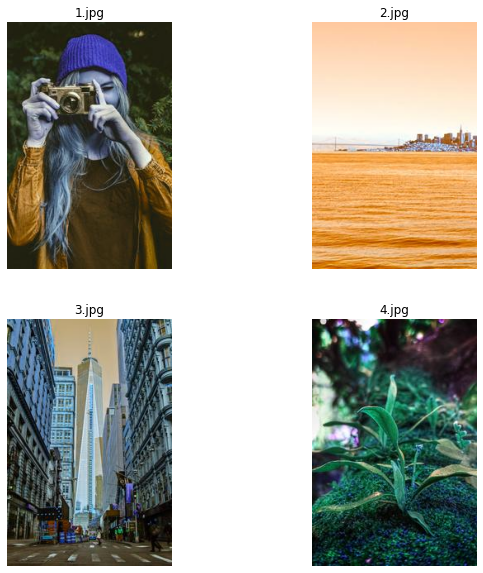

In [47]:
sub = Subplot()
sub.print_img_subplot(2,2,[10,10],4,[img11.img,img22.img,img33.img,img44.img],["1.jpg","2.jpg","3.jpg","4.jpg"])

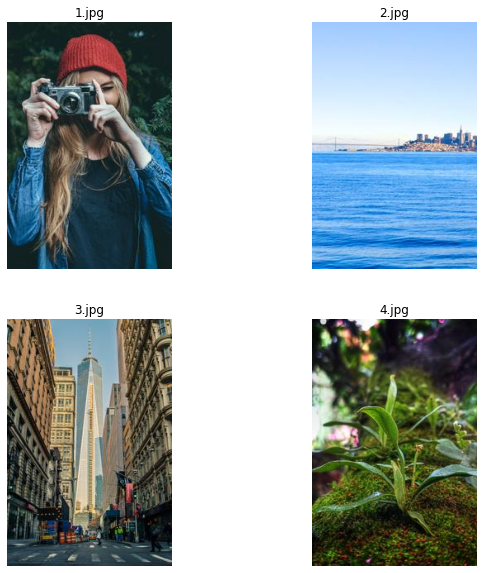

In [48]:
sub = Subplot()
sub.print_img_subplot(2,2,[10,10],4,[img1.img,img2.img,img3.img,img4.img],["1.jpg","2.jpg","3.jpg","4.jpg"])

> # 4. Convert any colour image (of your choice) to grayscale without using a function and save that image in the images folder.

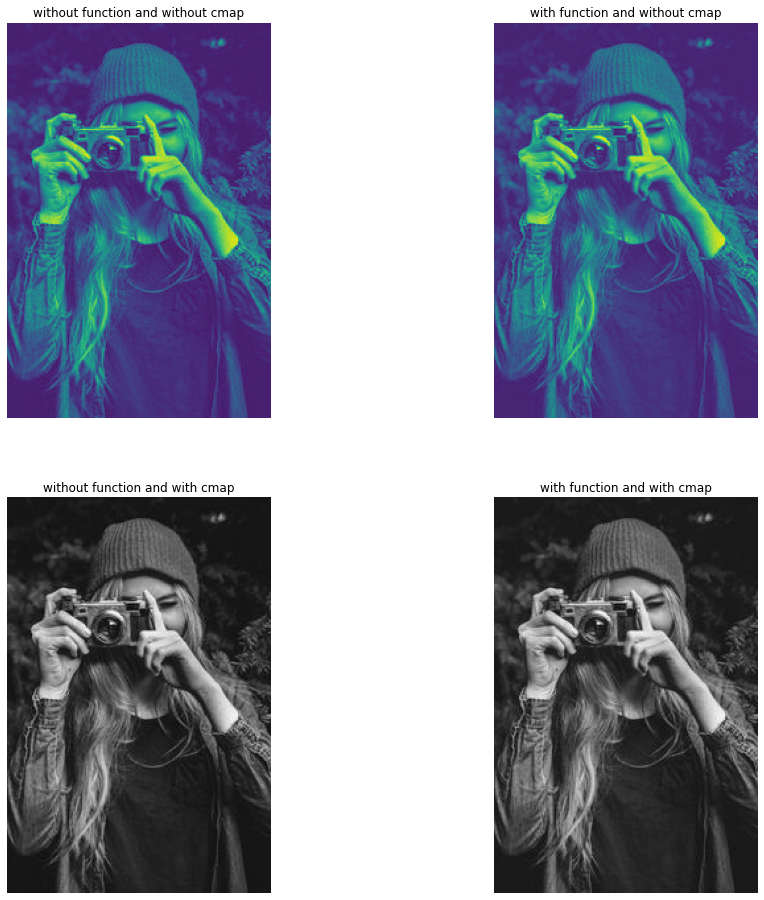

True

In [55]:

# gray_img1,a,b = grayscale_without_fun(img1.img)
gray_img2=grayscale_without_fun2(img1.img)

img_gray = cv2.imread("1.jpg",0)
fig = plt.figure(figsize=(16,16))
ax1 = fig.add_subplot(221)
ax1.imshow(gray_img2)
ax1.axis('off')
ax1.title.set_text("without function and without cmap")
ax2 = fig.add_subplot(222)
ax2.imshow(img_gray)
ax2.axis('off')
ax2.title.set_text("with function and without cmap")
ax3 = fig.add_subplot(223)
ax3.imshow(gray_img2,cmap="gray")
ax3.axis('off')
ax3.title.set_text("without function and with cmap")
ax4 = fig.add_subplot(224)
ax4.imshow(img_gray,cmap='gray')
ax4.axis('off')
ax4.title.set_text("with function and with cmap")
plt.show()

cv2.imwrite('../images/img1_withoutcmap.jpg', gray_img1)
cv2.imwrite('../images/img1_withcmap.jpg', gray_img1)


> # 5. Print the dimensions of one of the images (Height, Width, Channels).

In [50]:
print("Rows, Columns, Channels:",img1.img.shape)

Rows, Columns, Channels: (300, 200, 3)


> # 6. Check the range of values in the image. What do you infer from this?

> ### for img1 it has array of dimensions `300 x 200 x 3` and iterating over each set of value its min and max values are 0 and 255 i.e. each val lies b/w [0,255] and each of these values decides final image of size 300x200 so each 1x1 area requires 24 bits (8 bit for each R,G,B deciding a value between 0 to 255).

> # OPTIONAL 2 (WEBCAM)

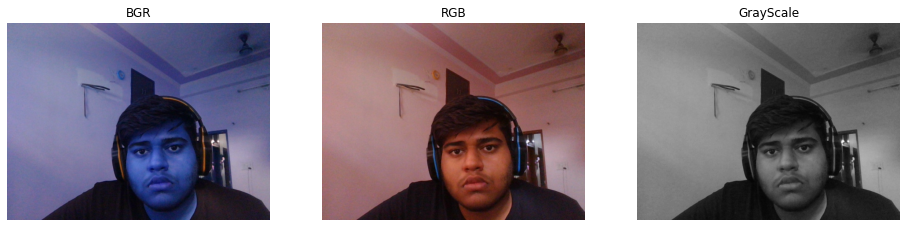

In [56]:
img = cap_img_webcam("../images/captured_img.jpg")
cap_img=Image()
cap_img.img=img
cap_img.bgr_to_rgb()
fig = plt.figure(figsize=(16,16))
ax1 = fig.add_subplot(131)
ax1.imshow(img)
ax1.axis('off')
ax1.title.set_text("BGR")
ax2 = fig.add_subplot(132)
ax2.imshow(cap_img.img)
ax2.axis('off')
ax2.title.set_text("RGB")
ax3 = fig.add_subplot(133)
ax3.imshow(grayscale_without_fun(cap_img.img)[0],cmap="gray")
ax3.axis('off')
ax3.title.set_text("GrayScale")
plt.show()
